**Importing Libraries and Defining Hyperparameters & Visualization Function**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a n*n grid (n^2 sectors)
grid_size = (10, 10)

# number of flags and initial heat value for flags
num_flags = 2
flag_value = 10

In [ ]:
def vis():
  # Create subplots
  fig, axes = plt.subplots(1, 2, figsize=(16, 8))

  # Plot the flag array on the first subplot
  axes[0].imshow(flag_array, interpolation='nearest')
  axes[0].set_xticks(np.arange(-0.5, grid_size[0], 1), minor=True)
  axes[0].set_yticks(np.arange(-0.5, grid_size[1], 1), minor=True)
  axes[0].grid(which='minor', color='black', linestyle='-', linewidth=0.5)
  axes[0].invert_yaxis()
  axes[0].set_title(f'Flag Placement for {num_flags} Flags ({grid_size} Grid)')

  # Plot the heatmap on the second subplot
  heatmap_plot = axes[1].imshow(heatmap, cmap='hot', interpolation='bicubic')
  axes[1].set_xticks(np.arange(-0.5, grid_size[0], 1), minor=True)
  axes[1].set_yticks(np.arange(-0.5, grid_size[1], 1), minor=True)
  axes[1].grid(which='minor', color='black', linestyle='-', linewidth=0.5)
  axes[1].invert_yaxis()
  axes[1].set_title('Gaussian Spread Heatmap')

  # Add color bar to the heatmap
  plt.colorbar(heatmap_plot, ax=axes[1], label='Heatmap Values (Gaussian Distribution)')

  # Display the plots
  plt.tight_layout()
  plt.show()

# Random Flag locations & Gaussian Heatmap Visualizations - 2D & 3D

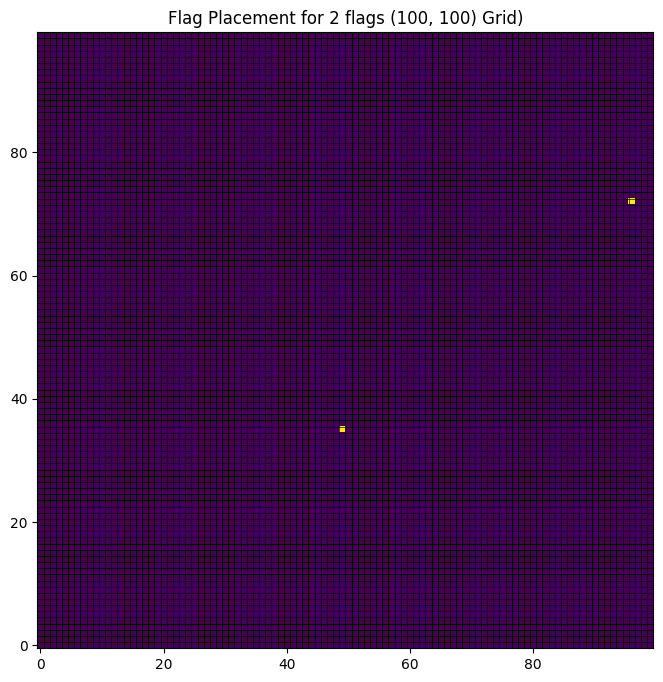

In [ ]:
# Create an empty flag array (initialized to 0)
flag_array = np.zeros(grid_size)

# Randomly select 500 unique locations to place the flags (value 1 represents a flag)
flag_positions = np.random.choice(np.arange(grid_size[0]*grid_size[1]), num_flags, replace=False)

# Assign flags to the selected positions
for pos in flag_positions:
    row = pos // grid_size[0]  # Get the row index
    col = pos % grid_size[1]   # Get the column index
    flag_array[row, col] = flag_value

# Visualize the flag placement (showing flag locations in white on a black background)
plt.figure(figsize=(8, 8))
plt.imshow(flag_array, interpolation='nearest')

# Add gridlines (visible sector boundaries)
ax = plt.gca()  # Get current axis
ax.set_xticks(np.arange(-0.5, grid_size[0], 1), minor=True)  # Set x ticks for gridlines
ax.set_yticks(np.arange(-0.5, grid_size[1], 1), minor=True)  # Set y ticks for gridlines
ax.grid(which='minor', color='black', linestyle='-', linewidth=0.5)  # Add gridlines
ax.tick_params(which='minor', size=0)  # Hide minor tick marks
ax.invert_yaxis()

plt.title(f'Flag Placement for {num_flags} flags {grid_size} Grid)')
plt.show()

In [ ]:
print(flag_positions)
for pos in flag_positions:
    row = pos // grid_size[0]  # Get the row index
    col = pos % grid_size[1]   # Get the column index
    print(row,col)

[3549 7296]
35 49
72 96


min-heat-val 0.02342513963299862 max-heat-val 1.0


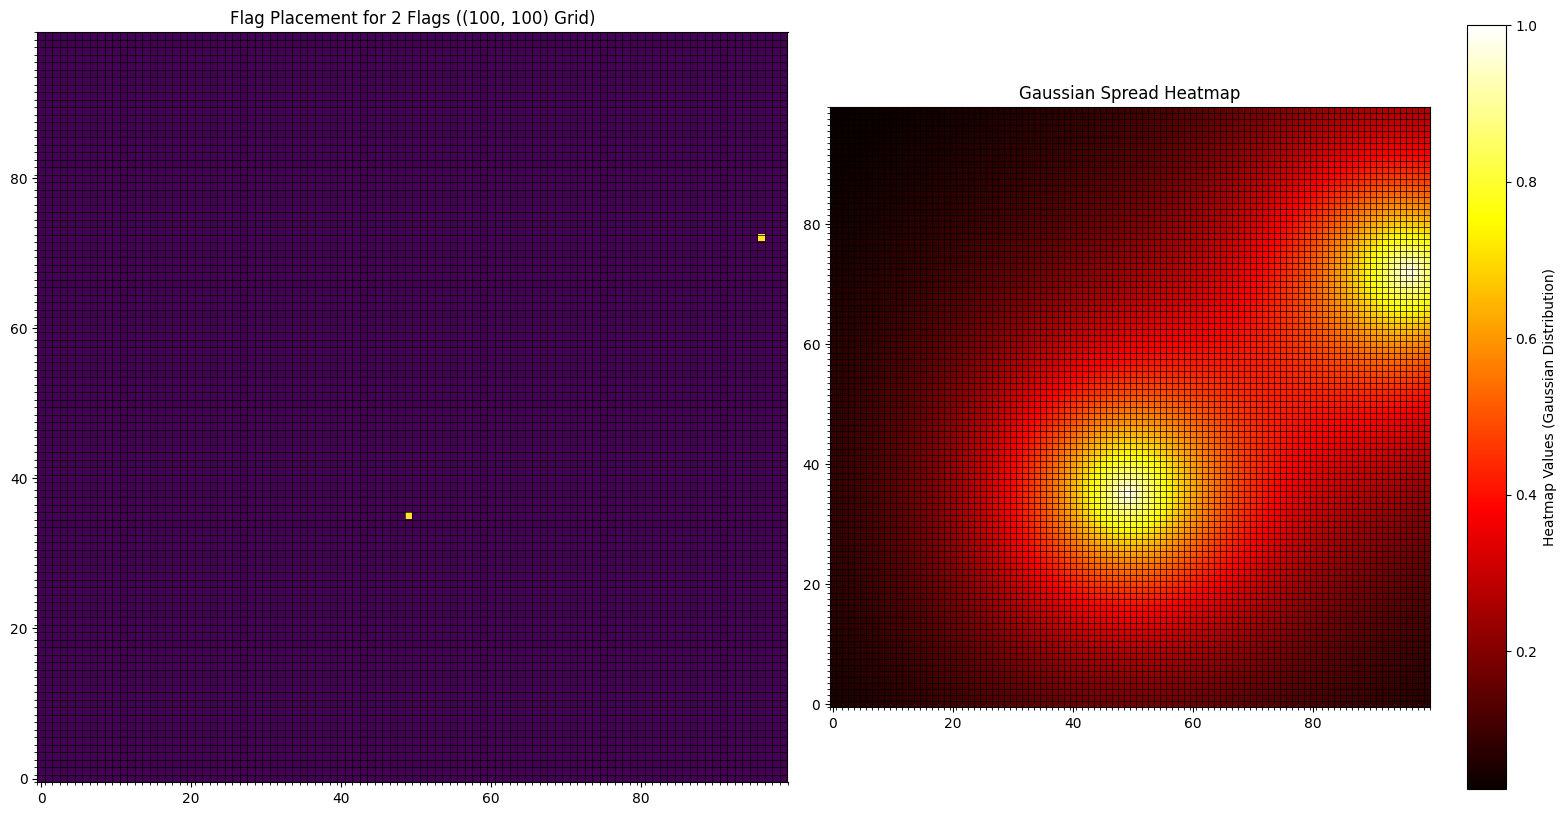

In [ ]:
def create_flag_heatmap(flag_array, size=grid_size, peak_value=1.0, spread=20.0):
    heatmap = np.zeros(size)
    for i in range(size[0]):
        for j in range(size[1]):
            if flag_array[i, j] == flag_value:  # Check if there is a flag at this location
                # Create Gaussian-like heat spread around the flag
                for x in range(size[0]):
                    for y in range(size[1]):
                        distance = np.sqrt((x - i) ** 2 + (y - j) ** 2)
                        heatmap[x, y] += peak_value * np.exp(-distance / spread)  # Accumulate heat values
    return heatmap

heatmap = create_flag_heatmap(flag_array)
# Normalize the heatmap to range [0, 1]
heatmap = heatmap / np.max(heatmap)
print("min-heat-val",np.min(heatmap),"max-heat-val",np.max(heatmap))
vis()

<ipython-input-50-50f5c7163718>:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mappable, label='Heat Values')


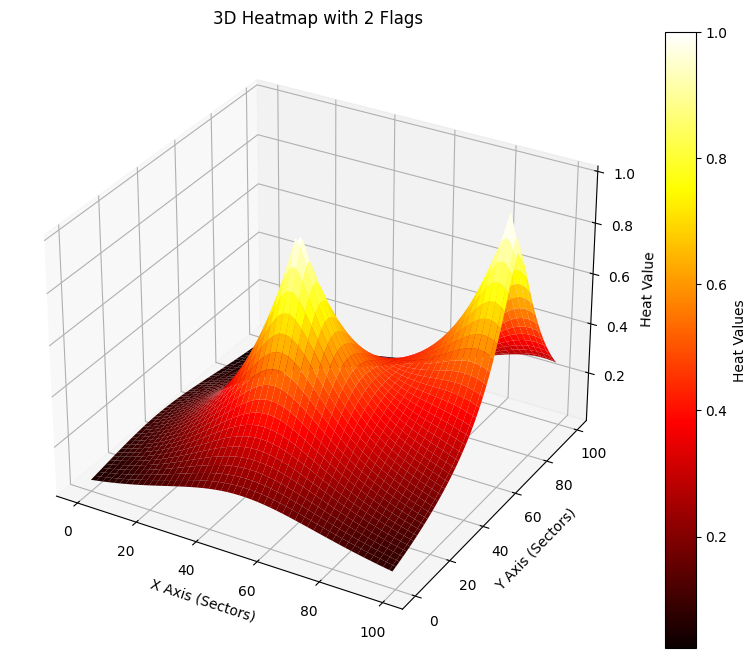

In [ ]:
# Assuming heatmap is already defined and contains the heat values

from mpl_toolkits.mplot3d import Axes3D

# Create grid coordinates for the x and y axes
x = np.arange(heatmap.shape[1])  # 100 for x-axis
y = np.arange(heatmap.shape[0])  # 100 for y-axis
x, y = np.meshgrid(x, y)  # Create a meshgrid for the 2D plane

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
# Use x, y for the base, and heatmap for the height
ax.plot_surface(x, y, heatmap, cmap='hot', edgecolor='none')

# Set labels
ax.set_xlabel('X Axis (Sectors)')
ax.set_ylabel('Y Axis (Sectors)')
ax.set_zlabel('Heat Value')

# Set title
ax.set_title(f'3D Heatmap with {num_flags} Flags')

# Add color bar
mappable = plt.cm.ScalarMappable(cmap='hot')
mappable.set_array(heatmap)
plt.colorbar(mappable, label='Heat Values')

# Show the plot
plt.show()

# Saving and Loading Heatmap

In [ ]:
np.save('heatmap.npy', heatmap)
print("Heatmap saved to file 'heatmap.npy'")
loaded_heatmap = np.load('heatmap.npy')
heatmap = loaded_heatmap

Heatmap saved to file 'heatmap.npy'


In [ ]:
from geopy.distance import distance
import numpy as np

def move_gps(lat, lon, meters, dir):
    # Define the starting point
    start_point = (lat, lon)
    # Calculate the new point after moving forward by 'meters'
    new_point = distance(meters=meters).destination(start_point, dir)
    return [new_point.latitude, new_point.longitude]

def displacement_components(old_lat, old_lon, new_lat, new_lon):
    # Earth radius in meters
    R = 6371000  # Earth's radius in meters

    # Convert latitude and longitude from degrees to radians
    lat1_rad = np.radians(old_lat)
    lat2_rad = np.radians(new_lat)
    delta_lat = np.radians(new_lat - old_lat)
    delta_lon = np.radians(new_lon - old_lon)

    # Calculate the displacement in Y (North-South)
    y = delta_lat * R

    # Calculate the displacement in X (East-West)
    x = delta_lon * R * np.cos(lat1_rad)  # Multiply by cos(latitude) to account for the Earth's curvature

    return x, y

# Example usage
old_lat = 40.7128
old_lon = -74.0060
meters = 100  # Example displacement

# Move the GPS
new_coordinates = move_gps(old_lat, old_lon, meters, 90) #100m South
new_coordinates = move_gps(new_coordinates[0], new_coordinates[1], meters/2, 180) #100m West

# Calculate displacement components
x_component, y_component = displacement_components(old_lat, old_lon, new_coordinates[0], new_coordinates[1])

print(f"New Coordinates: {new_coordinates}")
print(f"Displacement X: {x_component:.2f} m, Displacement Y: {y_component:.2f} m")

New Coordinates: [40.712349739633524, -74.00481655863739]
Displacement X: 99.75 m, Displacement Y: -50.07 m


In [ ]:
import numpy as np

# Example values of x_disp
x_disp = np.array([-1.5, -0.4, 50.6, 100.0, 99.7, -100.3])  # Example input

# Function to process x_disp
def process_x_disp(x_disp):
    # Take the absolute value
    abs_x_disp = np.abs(x_disp)

    # Round to nearest integer
    rounded_x_disp = np.round(abs_x_disp).astype(int)

    # Handle specific cases
    rounded_x_disp[rounded_x_disp == -1] = 0  # if -1, set to 0
    rounded_x_disp[rounded_x_disp == 100] = 99  # if 100, set to 99

    return rounded_x_disp

# Process the x_disp array
result = process_x_disp(x_disp)

print("Processed x_disp values:", result)

Processed x_disp values: [ 2  0 51 99 99 99]


# Visualize loaded heatmap

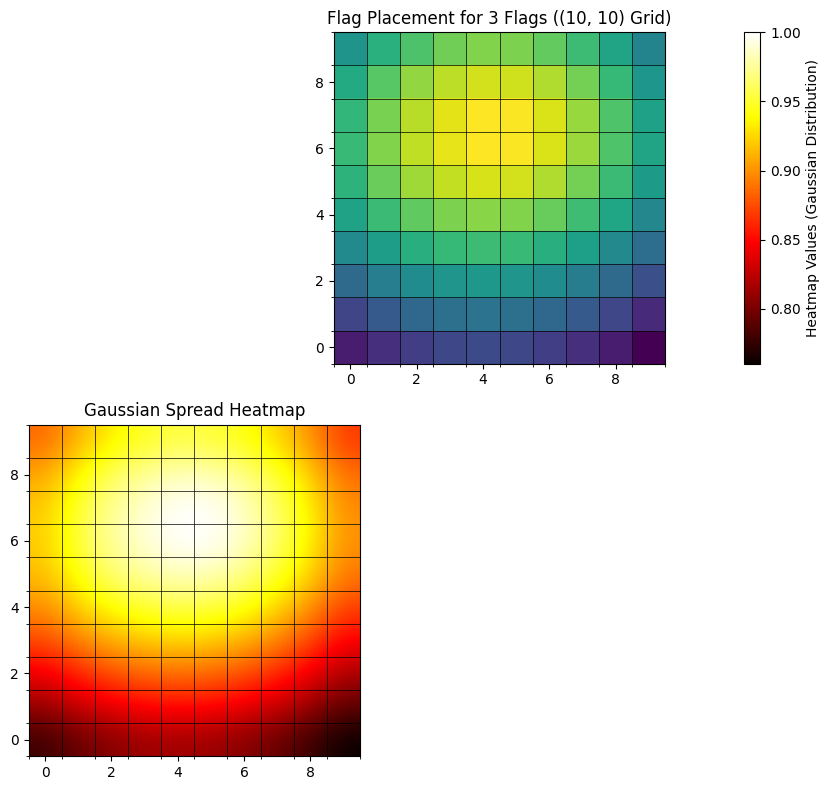

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def vis(heatmap, grid_size):
  # Create subplots
  fig, axes = plt.subplots(2, 1, figsize=(16, 8))

#   # Plot the flag array on the first subplot
  axes[0].imshow(heatmap, interpolation='nearest')
  axes[0].set_xticks(np.arange(-0.5, grid_size[0], 1), minor=True)
  axes[0].set_yticks(np.arange(-0.5, grid_size[1], 1), minor=True)
  axes[0].grid(which='minor', color='black', linestyle='-', linewidth=0.5)
  axes[0].invert_yaxis()
  axes[0].set_title(f'Flag Placement for {3} Flags ({grid_size} Grid)')

  # Plot the heatmap on the second subplot
  heatmap_plot = axes[1].imshow(heatmap, cmap='hot', interpolation='bicubic')
  axes[1].set_xticks(np.arange(-0.5, grid_size[0], 1), minor=True)
  axes[1].set_yticks(np.arange(-0.5, grid_size[1], 1), minor=True)
  axes[1].grid(which='minor', color='black', linestyle='-', linewidth=0.5)
  axes[1].invert_yaxis()
  axes[1].set_title('Gaussian Spread Heatmap')

  # Add color bar to the heatmap
  plt.colorbar(heatmap_plot, ax=axes[0], label='Heatmap Values (Gaussian Distribution)')

  # Display the plots
  plt.tight_layout()
  plt.show()

grid_size = (10, 10)
loaded_heatmap = np.load('heatmap.npy')
vis(loaded_heatmap, grid_size)

<ipython-input-11-ee44f2bd42d7>:27: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mappable, label='Heat Values')


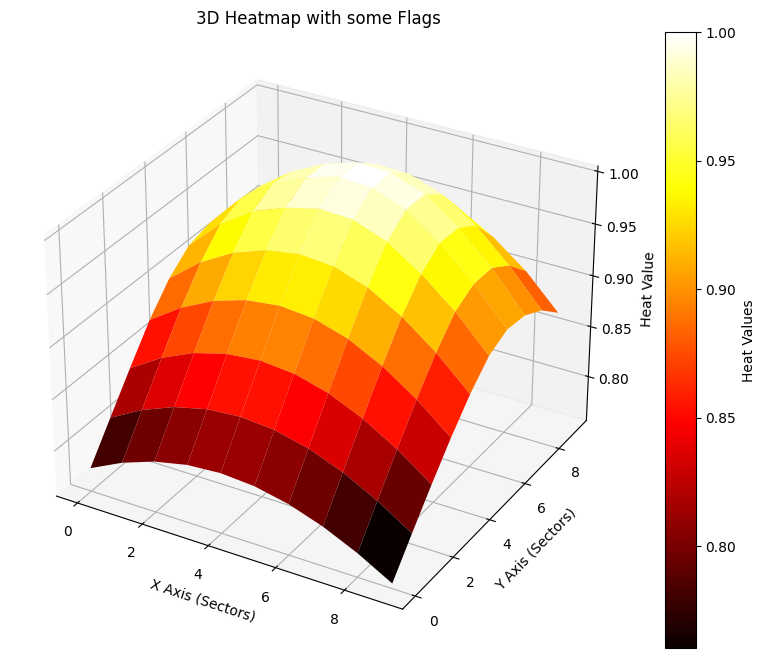

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
heatmap = loaded_heatmap
# Create grid coordinates for the x and y axes
x = np.arange(heatmap.shape[1])  # 100 for x-axis
y = np.arange(heatmap.shape[0])  # 100 for y-axis
x, y = np.meshgrid(x, y)  # Create a meshgrid for the 2D plane

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
# Use x, y for the base, and heatmap for the height
ax.plot_surface(x, y, heatmap, cmap='hot', edgecolor='none')

# Set labels
ax.set_xlabel('X Axis (Sectors)')
ax.set_ylabel('Y Axis (Sectors)')
ax.set_zlabel('Heat Value')

# Set title
ax.set_title(f'3D Heatmap with some Flags')

# Add color bar
mappable = plt.cm.ScalarMappable(cmap='hot')
mappable.set_array(heatmap)
plt.colorbar(mappable, label='Heat Values')

# Show the plot
plt.show()